In [1]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Reading Data

In [2]:
data = torch.load('./Data/Features/vit_b_16_features.pt')
for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (60000, 768) (60000,)
Test Data (X, y):  (10000, 768) (10000,)


# Data Splitting

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data['train'][0], data['train'][1], test_size = 5000, stratify = data['train'][1], random_state = 10)
data['train'] = [X_train, y_train] 
data['val'] = [X_val, y_val]

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 768) (55000,)
Test Data (X, y):  (10000, 768) (10000,)
Val Data (X, y):  (5000, 768) (5000,)


# Data Transformation

## PCA

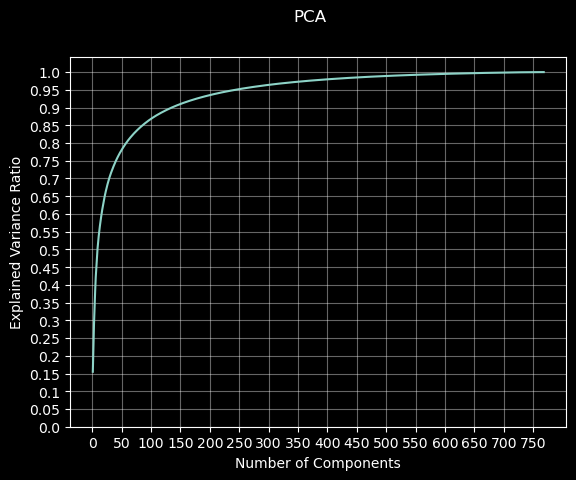

The least number of features to reach 95% variance:  244


In [4]:
pca = PCA()
pca.fit(data['train'][0])
explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratios)+1), explained_variance_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.suptitle('PCA')
plt.yticks(np.array(range(0, 105, 5))/100, np.array(range(0, 105, 5))/100)
plt.xticks(range(0, len(explained_variance_ratios)+1, 50), range(0, len(explained_variance_ratios)+1, 50))
plt.grid(True, alpha=0.4)
plt.show()

for i in range(len(explained_variance_ratios)):
    if(explained_variance_ratios[i] > 0.95):
        print("The least number of features to reach 95% variance: ", i+1)
        break

Based on this plot we can see that with 244 components we are able to explain about 95% of our variance.  
So, we will transform our data using n_components = 244

In [5]:
pca = PCA(n_components=244)
data['train'][0] = pca.fit_transform(data['train'][0])
data['val'][0] = pca.transform(data['val'][0])
data['test'][0] = pca.transform(data['test'][0])

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 244) (55000,)
Test Data (X, y):  (10000, 244) (10000,)
Val Data (X, y):  (5000, 244) (5000,)


## Normalization

In [6]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler().fit(data['train'][0])
data['train'][0] = normalizer.transform(data['train'][0])
data['val'][0] = normalizer.transform(data['val'][0])
data['test'][0] = normalizer.transform(data['test'][0])

## ANOVA Test

In [7]:
# from sklearn.feature_selection import SelectPercentile, f_classif

# top_features = SelectPercentile(f_classif, percentile=90).fit_transform(*data['train'])
# top_features.shape

# EDA

In [8]:
# TODO
# Plot examples of each class

In [9]:
X_df = pd.DataFrame(data['train'][0])
y_df = pd.DataFrame(data['train'][1])

X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
count,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,...,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04
mean,-9.710138e-09,6.658381e-09,-1.130538e-08,-1.095859e-08,-9.016557e-09,-8.322976e-10,-1.179088e-08,5.548650e-09,3.675981e-09,-8.912520e-09,...,1.702742e-08,-4.855069e-09,8.739125e-09,4.092130e-09,9.432706e-09,5.687367e-09,-1.054244e-08,-1.151345e-08,5.132502e-09,1.179088e-08
std,1.000006e+00,1.000010e+00,1.000005e+00,1.000009e+00,1.000005e+00,1.000008e+00,1.000005e+00,1.000007e+00,1.000003e+00,1.000006e+00,...,1.000005e+00,1.000006e+00,1.000006e+00,1.000007e+00,1.000005e+00,1.000007e+00,1.000006e+00,1.000009e+00,1.000005e+00,1.000003e+00
min,-1.593894e+00,-2.473112e+00,-2.544342e+00,-2.633600e+00,-2.767799e+00,-2.424213e+00,-3.324756e+00,-3.164411e+00,-3.462818e+00,-3.557740e+00,...,-5.005367e+00,-5.523477e+00,-5.271501e+00,-5.006373e+00,-4.927985e+00,-4.936455e+00,-5.085054e+00,-5.040053e+00,-5.555015e+00,-5.509619e+00
25%,-8.725555e-01,-7.508719e-01,-8.234804e-01,-7.608720e-01,-7.351132e-01,-6.748347e-01,-6.895368e-01,-6.273977e-01,-6.588949e-01,-6.989841e-01,...,-6.361966e-01,-6.321713e-01,-6.327198e-01,-6.301680e-01,-6.332935e-01,-6.248819e-01,-6.439843e-01,-6.342262e-01,-6.258609e-01,-6.224108e-01
50%,-1.974200e-01,-8.272228e-02,4.735141e-02,7.797952e-02,-2.704359e-02,-1.181898e-01,2.359055e-03,-6.063002e-02,3.978590e-02,-5.971554e-03,...,-6.451452e-03,-4.186051e-03,-2.398931e-04,3.727235e-04,-5.966260e-03,-1.474796e-03,-7.393727e-03,-1.628486e-03,6.623340e-03,1.538649e-03
75%,8.396315e-01,6.157250e-01,7.392442e-01,7.542449e-01,7.320969e-01,4.984792e-01,6.588332e-01,6.037543e-01,6.944994e-01,7.074624e-01,...,6.222989e-01,6.204617e-01,6.293780e-01,6.343862e-01,6.259028e-01,6.417189e-01,6.338061e-01,6.322776e-01,6.358486e-01,6.226840e-01
max,2.335471e+00,2.909889e+00,2.635104e+00,2.714829e+00,2.976881e+00,3.974501e+00,3.803467e+00,3.678871e+00,3.503991e+00,3.784826e+00,...,5.216160e+00,5.561543e+00,5.452318e+00,5.562693e+00,5.141245e+00,6.251930e+00,5.921540e+00,5.485500e+00,5.848516e+00,6.444762e+00


As we can see, our columns are 0 mean and have a standard deviation of 1.

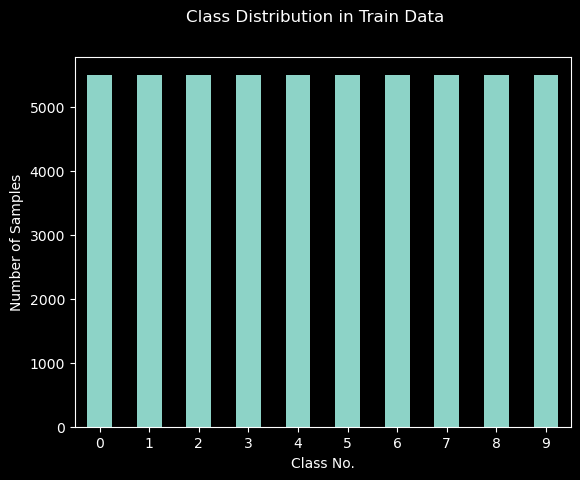

In [15]:
y_df.value_counts().plot(kind='bar')
plt.suptitle('Class Distribution in Train Data')
plt.xlabel('Class No.')
plt.ylabel('Number of Samples')
plt.xticks(range(0, 10), range(0, 10), rotation=0)
plt.show()

Equal samples of each class

# Models

## Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(*data['train'])

train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      5500
         1.0       1.00      0.85      0.92      5500
         2.0       0.79      0.71      0.75      5500
         3.0       0.78      0.76      0.77      5500
         4.0       0.75      0.73      0.74      5500
         5.0       0.83      0.94      0.88      5500
         6.0       0.58      0.51      0.54      5500
         7.0       0.91      0.87      0.89      5500
         8.0       0.68      0.96      0.79      5500
         9.0       0.95      0.88      0.91      5500

    accuracy                           0.80     55000
   macro avg       0.80      0.80      0.80     55000
weighted avg       0.80      0.80      0.80     55000



In [17]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77       500
         1.0       1.00      0.84      0.91       500
         2.0       0.80      0.72      0.76       500
         3.0       0.82      0.77      0.80       500
         4.0       0.74      0.74      0.74       500
         5.0       0.82      0.94      0.88       500
         6.0       0.55      0.49      0.52       500
         7.0       0.90      0.88      0.89       500
         8.0       0.67      0.95      0.79       500
         9.0       0.95      0.86      0.91       500

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



## Nearest Neighbour

100%|██████████| 29/29 [00:43<00:00,  1.50s/it]


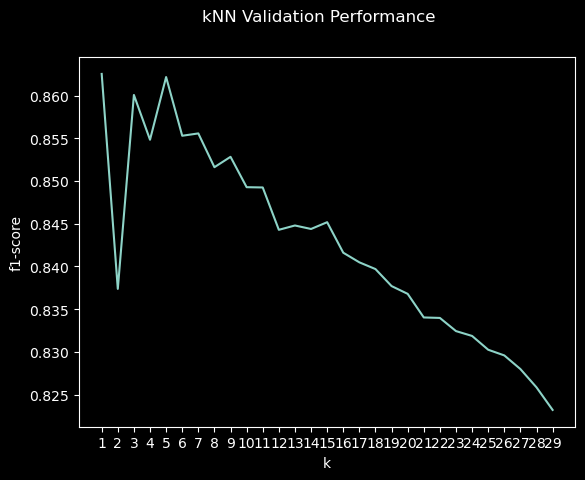

In [18]:
from sklearn.neighbors import KNeighborsClassifier

f1_scores = []
for k in tqdm(range(1, 30)):
    clf = KNeighborsClassifier(k).fit(*data['train'])
    score = f1_score(data['val'][1], clf.predict(data['val'][0]), average='macro')
    f1_scores.append(score)

plt.plot(range(1, 30), f1_scores)
plt.xticks(range(1, 30), range(1, 30))
plt.xlabel('k')
plt.ylabel('f1-score')
plt.suptitle('kNN Validation Performance')
plt.show()

As we can see, we acheived the best validation f1 score with k=1

In [19]:
clf = KNeighborsClassifier(n_neighbors=1).fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500
         2.0       1.00      1.00      1.00      5500
         3.0       1.00      1.00      1.00      5500
         4.0       1.00      1.00      1.00      5500
         5.0       1.00      1.00      1.00      5500
         6.0       1.00      1.00      1.00      5500
         7.0       1.00      1.00      1.00      5500
         8.0       1.00      1.00      1.00      5500
         9.0       1.00      1.00      1.00      5500

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [20]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       500
         1.0       0.93      0.98      0.96       500
         2.0       0.79      0.78      0.79       500
         3.0       0.85      0.86      0.86       500
         4.0       0.77      0.77      0.77       500
         5.0       0.97      0.94      0.96       500
         6.0       0.66      0.64      0.65       500
         7.0       0.91      0.95      0.93       500
         8.0       0.99      0.93      0.96       500
         9.0       0.95      0.93      0.94       500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500
         2.0       1.00      1.00      1.00      5500
         3.0       1.00      1.00      1.00      5500
         4.0       1.00      1.00      1.00      5500
         5.0       1.00      1.00      1.00      5500
         6.0       1.00      1.00      1.00      5500
         7.0       1.00      1.00      1.00      5500
         8.0       1.00      1.00      1.00      5500
         9.0       1.00      1.00      1.00      5500

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [22]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       500
         1.0       0.95      0.94      0.94       500
         2.0       0.66      0.65      0.65       500
         3.0       0.73      0.70      0.71       500
         4.0       0.58      0.59      0.58       500
         5.0       0.89      0.89      0.89       500
         6.0       0.47      0.48      0.47       500
         7.0       0.84      0.84      0.84       500
         8.0       0.92      0.92      0.92       500
         9.0       0.86      0.85      0.86       500

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000



## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500
         2.0       1.00      1.00      1.00      5500
         3.0       1.00      1.00      1.00      5500
         4.0       1.00      1.00      1.00      5500
         5.0       1.00      1.00      1.00      5500
         6.0       1.00      1.00      1.00      5500
         7.0       1.00      1.00      1.00      5500
         8.0       1.00      1.00      1.00      5500
         9.0       1.00      1.00      1.00      5500

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [24]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       500
         1.0       0.99      0.96      0.98       500
         2.0       0.81      0.81      0.81       500
         3.0       0.83      0.90      0.86       500
         4.0       0.76      0.81      0.78       500
         5.0       0.95      0.95      0.95       500
         6.0       0.67      0.56      0.61       500
         7.0       0.91      0.94      0.93       500
         8.0       0.98      0.97      0.97       500
         9.0       0.95      0.93      0.94       500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000).fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      5500
         1.0       1.00      0.99      0.99      5500
         2.0       0.86      0.86      0.86      5500
         3.0       0.90      0.91      0.91      5500
         4.0       0.84      0.84      0.84      5500
         5.0       0.99      0.98      0.98      5500
         6.0       0.74      0.70      0.72      5500
         7.0       0.96      0.97      0.96      5500
         8.0       1.00      1.00      1.00      5500
         9.0       0.97      0.97      0.97      5500

    accuracy                           0.91     55000
   macro avg       0.91      0.91      0.91     55000
weighted avg       0.91      0.91      0.91     55000



In [26]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       500
         1.0       0.99      0.98      0.99       500
         2.0       0.84      0.85      0.85       500
         3.0       0.90      0.92      0.91       500
         4.0       0.83      0.83      0.83       500
         5.0       0.97      0.97      0.97       500
         6.0       0.75      0.68      0.71       500
         7.0       0.93      0.95      0.94       500
         8.0       0.98      0.99      0.98       500
         9.0       0.96      0.94      0.95       500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



## SVM

In [10]:
from sklearn.svm import SVC

clf = SVC().fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      5500
         1.0       1.00      1.00      1.00      5500
         2.0       0.96      0.96      0.96      5500
         3.0       0.96      0.98      0.97      5500
         4.0       0.95      0.96      0.95      5500
         5.0       1.00      0.99      1.00      5500
         6.0       0.93      0.91      0.92      5500
         7.0       0.98      0.99      0.99      5500
         8.0       1.00      1.00      1.00      5500
         9.0       0.99      0.99      0.99      5500

    accuracy                           0.97     55000
   macro avg       0.97      0.97      0.97     55000
weighted avg       0.97      0.97      0.97     55000



In [11]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       500
         1.0       1.00      0.97      0.99       500
         2.0       0.89      0.88      0.88       500
         3.0       0.91      0.93      0.92       500
         4.0       0.85      0.88      0.86       500
         5.0       0.98      0.98      0.98       500
         6.0       0.78      0.76      0.77       500
         7.0       0.94      0.97      0.96       500
         8.0       0.98      1.00      0.99       500
         9.0       0.97      0.95      0.96       500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



## Feed Forward Network

In [12]:
from torch.utils.data import Dataset, DataLoader

class fmnist_vit_features_dataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data[1])
    
    def __getitem__(self, index):
        X = self.data[0][index]
        y = torch.zeros(size =(10,))
        y[int(self.data[1][index])] = 1
        return torch.tensor(X), y
        
train_loader = DataLoader(fmnist_vit_features_dataset(data['train']), batch_size= 512, num_workers=10)
val_loader = DataLoader(fmnist_vit_features_dataset(data['val']), batch_size= 512, num_workers=10)
test_loader = DataLoader(fmnist_vit_features_dataset(data['test']), batch_size= 512, num_workers=10)

In [13]:
from torch import nn

class FeedForwardNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU()
        )
        self.classification_head = nn.Sequential(
            nn.Linear(64, 10),
            nn.Softmax(dim=-1)
        )

    def forward(self, X):
        outs = self.linear(X)
        outs = self.classification_head(outs)
        return outs
    
device = ("cuda" if torch.cuda.is_available() else "cpu")

model = FeedForwardNetwork(data['train'][0].shape[1]).to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters())

num_epochs = 30

FeedForwardNetwork(
  (linear): Sequential(
    (0): Linear(in_features=244, out_features=64, bias=True)
    (1): ReLU()
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
    (1): Softmax(dim=-1)
  )
)


In [14]:
train_loss = []
train_f1_score = []

val_loss = []
val_f1_score = []

print('Training:')
for epoch in tqdm(range(0, num_epochs)):
    running_preds = []
    running_labels = []
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        with torch.no_grad():
            running_preds.append(pred)
            running_labels.append(y)

    preds, labels = torch.vstack(running_preds), torch.vstack(running_labels)
    train_loss.append(loss_fn(preds, labels).item())
    train_f1_score.append(f1_score(labels.argmax(-1).cpu(), preds.argmax(-1).cpu(), average='macro'))

    with torch.no_grad():
        running_preds = []
        running_labels = []
        for batch, (X,y) in enumerate(val_loader):
            X, y = X.to(device), y.to(device)

            pred = model(X)

            running_preds.append(pred)
            running_labels.append(y)

        preds, labels = torch.vstack(running_preds), torch.vstack(running_labels)
        val_loss.append(loss_fn(preds, labels).item())   
        val_f1_score.append(f1_score(labels.argmax(-1).cpu(), preds.argmax(-1).cpu(), average='macro'))


Training:


100%|██████████| 30/30 [00:35<00:00,  1.17s/it]


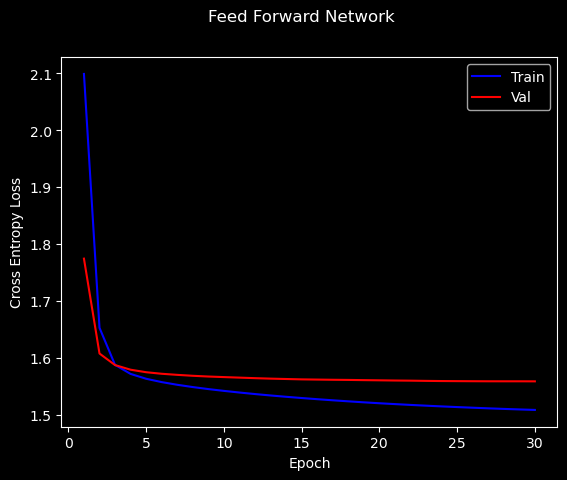

In [15]:
plt.plot(range(1, len(train_loss)+1), train_loss, label = 'Train', c='blue')
plt.plot(range(1, len(val_loss)+1), val_loss, label = 'Val', c='red')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.suptitle('Feed Forward Network')
plt.legend()
plt.show()

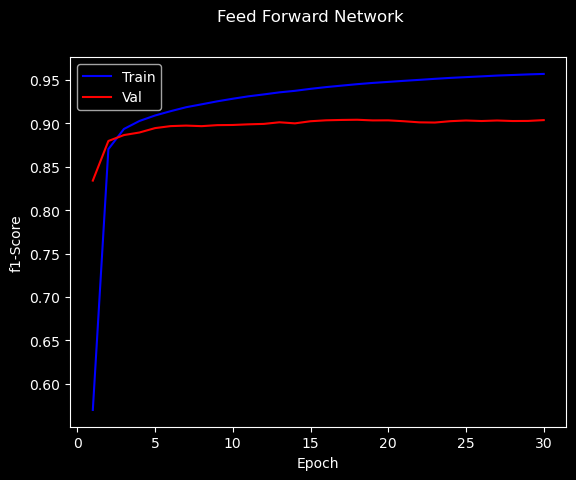

In [16]:
plt.plot(range(1, len(train_f1_score)+1), train_f1_score, label = 'Train', c='blue')
plt.plot(range(1, len(val_f1_score)+1), val_f1_score, label = 'Val', c='red')
plt.xlabel('Epoch')
plt.ylabel('f1-Score')
plt.suptitle('Feed Forward Network')
plt.legend()
plt.show()

In [17]:
model.cpu()
with torch.no_grad():
    print('Train Metrics')
    print(classification_report(model(torch.tensor(data['train'][0])).argmax(-1), data['train'][1]))

Train Metrics
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5531
           1       0.99      1.00      0.99      5476
           2       0.94      0.93      0.94      5509
           3       0.96      0.93      0.95      5672
           4       0.94      0.92      0.93      5575
           5       0.99      1.00      0.99      5475
           6       0.86      0.90      0.88      5224
           7       0.99      0.98      0.98      5563
           8       1.00      1.00      1.00      5503
           9       0.98      0.99      0.98      5472

    accuracy                           0.96     55000
   macro avg       0.96      0.96      0.96     55000
weighted avg       0.96      0.96      0.96     55000



In [18]:
with torch.no_grad():
    print('Val Metrics')
    print(classification_report(model(torch.tensor(data['val'][0])).argmax(-1), data['val'][1]))

Val Metrics
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       517
           1       0.98      0.99      0.98       494
           2       0.85      0.86      0.85       496
           3       0.91      0.89      0.90       515
           4       0.85      0.81      0.83       524
           5       0.97      0.97      0.97       502
           6       0.69      0.78      0.73       445
           7       0.95      0.94      0.95       508
           8       0.99      0.99      0.99       502
           9       0.95      0.96      0.96       497

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.91      0.90      0.91      5000



## Transformer